In [1]:
import pandas as pd
import numpy as np
import zipfile
import kaggle
import matplotlib.pyplot as plt

In [2]:
# download the dataset direct from kaggle

!kaggle datasets download -d mragpavank/heart-diseaseuci

Dataset URL: https://www.kaggle.com/datasets/mragpavank/heart-diseaseuci
License(s): unknown
heart-diseaseuci.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# name of the zipfile

zipfile_name = 'heart-diseaseuci.zip'

#extract the content of the zipfile
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

print('Extraction completed')

Extraction completed


In [4]:
# check the extracted file

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data preprocessing

In [5]:
# let's check basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# check the data types of each column
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# check if there are any missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
# standardize the features

from sklearn.preprocessing import StandardScaler

features  = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

X = df[features]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## Exploration Data Analysis

In [11]:
# let's melt the data frame for visualization purposes

scaled_feat = pd.DataFrame(X_scaled)
scaled_feat.columns = features

df_melt = scaled_feat.melt(var_name = 'attribute', value_name = 'value')

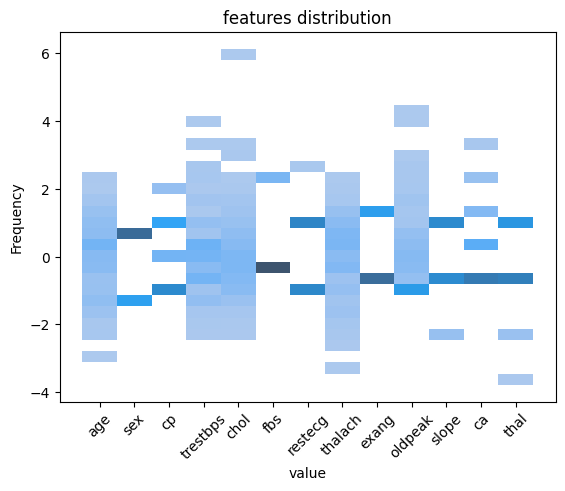

In [12]:
# Let's visualize the data

import seaborn as sns

sns.histplot(x='attribute', y='value', data = df_melt, kde = False, bins = 30 )
plt.title('features distribution')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

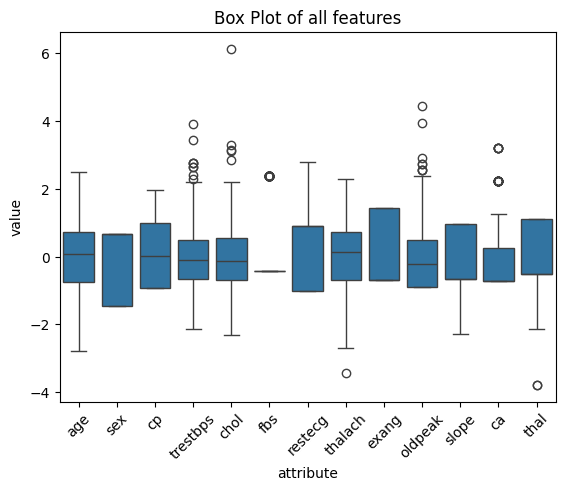

In [13]:
sns.boxplot(x='attribute', y='value', data = df_melt)
plt.title('Box Plot of all features')
plt.xlabel('attribute')
plt.ylabel('value')
plt.xticks(rotation = 45)
plt.show()

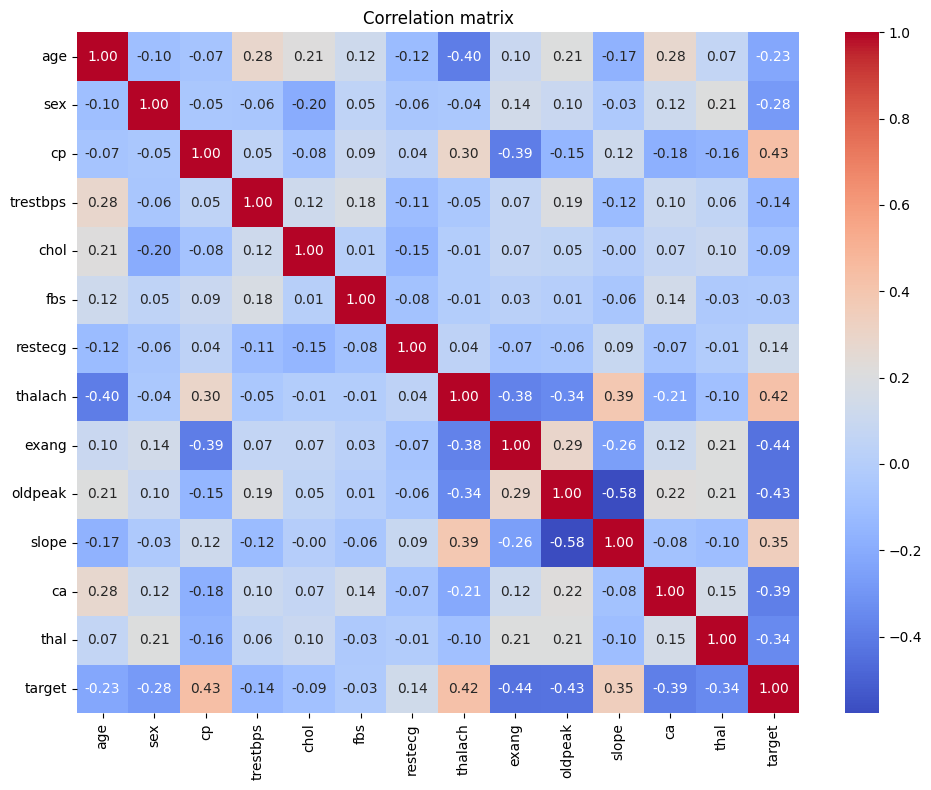

In [14]:
# let's check the correlation between features and the target values


plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation matrix')
plt.tight_layout()
plt.savefig('correlation matrix')
plt.show()

none of the features are correlated with the target values, thus we need other ones!

In [15]:
# descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Feature Engineering

In [16]:
# First reset the index to ensure no duplicates
df = df.reset_index(drop=True)

# Now perform all your feature engineering operations:

# Age feature binning
df['age_bin'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80],
                      labels=['young', 'adult', 'mature', 'senior', 'old', 'very_old'])

# Bin cholesterol levels
df['chol_bin'] = pd.qcut(df['chol'], q=4, labels=['low', 'medium', 'high', 'very high'])

# Based on domain knowledge in medicine
# Blood pressure to cholesterol ratio
df['bp_chol_ratio'] = df['trestbps'] / (df['chol'] + 1e-6)

# Heart rate stress index (thalach vs resting bp)
df['hr_stress_index'] = df['thalach'] / df['trestbps']

# Chest pain and exercise induced angina combination
df['cp_exang_combo'] = np.where((df['cp'] > 0) & (df['exang'] > 0), 1, 0)

# Age-adjusted maximum heart rate
df['age_adj_thalach'] = df['thalach'] / (220 - df['age'])

# Combine some features
df['cp_thalach'] = df['cp'] * df['thalach'] 
df['exang_oldpeak'] = df['exang'] * df['oldpeak']  
df['slope_thalach'] = df['slope'] * df['thalach'] 
df['age_chol'] = df['age'] * df['chol'] 

# Create ratio features
df['thalach_oldpeak_ratio'] = df['thalach'] / (df['oldpeak'] + 1e-6) 
df['cp_exang_ratio'] = df['cp'] / (df['exang'] + 1e-6)

In [17]:
# Convert categorical variable to numeric
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
df['age_code'] = Le.fit_transform(df['age_bin'])
df['chol_code'] = Le.fit_transform(df['chol_bin'])

In [18]:
new_features = ['age_code', 'bp_chol_ratio', 'hr_stress_index', 'cp_exang_combo', 'age_adj_thalach', 'cp_thalach', 'exang_oldpeak',
               'slope_thalach', 'thalach_oldpeak_ratio', 'age_chol', 'chol_code',  'cp_exang_ratio']

correlations = df[new_features + ['target']].corr()['target'].sort_values(ascending=False)

print(correlations)

target                   1.000000
cp_thalach               0.453050
cp_exang_ratio           0.409506
slope_thalach            0.402883
hr_stress_index          0.401645
age_adj_thalach          0.363577
thalach_oldpeak_ratio    0.295000
cp_exang_combo           0.072533
bp_chol_ratio            0.000723
chol_code               -0.066639
age_code                -0.114797
age_chol                -0.174073
exang_oldpeak           -0.441903
Name: target, dtype: float64


the features 'cp_thalach', 'exang' and 'oldpeak' are chosen for model development

## Model development

In [19]:
# Redefine the features for the Logistic Regression

new_feature = ['cp_thalach', 'exang', 'oldpeak']  

x = df[new_feature]
y = df['target']

# standardise

scaler = StandardScaler()

Xs = scaler.fit_transform(x)

In [20]:
# Let's split the data into a train and test split

from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f'The train set size is: {Xs_train.shape}, {y_train.shape}')
print('-----------------------')
print(f'The test set size is: {Xs_test.shape}, {y_test.shape}')

The train set size is: (212, 13), (212,)
-----------------------
The test set size is: (91, 13), (91,)


In [21]:
# Let's fit a Logistic model to the dataset

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(Xs_train, y_train)

# let's predict over the test set

yhat  = LR.predict(Xs_test)
yhat

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [22]:
# let's fit a decision tree model
from sklearn.tree import DecisionTreeClassifier
heartTree = DecisionTreeClassifier(criterion='entropy', max_depth = 3)

#fit the model to the dataset

heartTree.fit(Xs_train, y_train)

# Let's predict on the test set
predTree = heartTree.predict(Xs_test)
predTree

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

## Model Evaluation

In [23]:
# Let's compute the accuracy for both models

from sklearn import metrics

print(f'The accuracy of the Logistic Regression model is: {metrics.accuracy_score(y_test, yhat)}')
print('................')
print(f'The accuracy of the Decision Tree model is: {metrics.accuracy_score(y_test, predTree)}')

The accuracy of the Logistic Regression model is: 0.8351648351648352
................
The accuracy of the Decision Tree model is: 0.7692307692307693


In [24]:
# Let's compute Precision, Recall, and F1-Score for both models

from sklearn.metrics import classification_report

print(f"The accuracy of the Logistic Regression model is: {classification_report(y_test, yhat, target_names=['No heart disease', 'heart disease'])}")
print('................')
print(f"The accuracy of the Decision Tree model is: {classification_report(y_test, predTree, target_names=['No heart disease', 'heart disease'])}")

The accuracy of the Logistic Regression model is:                   precision    recall  f1-score   support

No heart disease       0.82      0.80      0.81        41
   heart disease       0.84      0.86      0.85        50

        accuracy                           0.84        91
       macro avg       0.83      0.83      0.83        91
    weighted avg       0.83      0.84      0.83        91

................
The accuracy of the Decision Tree model is:                   precision    recall  f1-score   support

No heart disease       0.73      0.78      0.75        41
   heart disease       0.81      0.76      0.78        50

        accuracy                           0.77        91
       macro avg       0.77      0.77      0.77        91
    weighted avg       0.77      0.77      0.77        91



In [25]:
# let's compute ROC and AUC

from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# get the probabilities for both models

y_prob_LR = LR.predict_proba(Xs_test)[:, 1]
y_prob_ht = heartTree.predict_proba(Xs_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_LR)
auc_score = roc_auc_score(y_test, y_prob_LR)
print(f"The AUC Score of the Logistic Regression model is: {auc_score:.3f}")
print('......................................')
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ht)
auc_score = roc_auc_score(y_test, y_prob_ht)
print(f"The AUC Score of the Decision tree model is: {auc_score:.3f}")

The AUC Score of the Logistic Regression model is: 0.901
......................................
The AUC Score of the Decision tree model is: 0.847


In [26]:
# let's implement cross validation
from sklearn.model_selection import cross_val_score

# Compute F1 score with 5-fold cross validation on both models

f1_score_LR = cross_val_score(LR, Xs, y, cv=5, scoring='f1')
f1_score_ht = cross_val_score(heartTree, Xs, y, cv=5, scoring='f1')

print(f'F1 score of the Logistic Regression model is: {f1_score_LR}')
print(f'Mean F1 score of the Logistic Regression model is: {f1_score_LR.mean():.2f}')
print('..................................')
print(f'F1 score of the Decision Tree model is: {f1_score_ht}')
print(f'Mean F1 score of the Decison Tree model is: {f1_score_ht.mean():.2f}')

F1 score of the Logistic Regression model is: [0.77142857 0.85714286 0.76923077 0.80597015 0.78873239]
Mean F1 score of the Logistic Regression model is: 0.80
..................................
F1 score of the Decision Tree model is: [0.82191781 0.8        0.75757576 0.8        0.8       ]
Mean F1 score of the Decison Tree model is: 0.80


In [27]:
# Let's use Gridsearch to tune the parameters of the Decision Tree model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Can change to 'accuracy', 'roc_auc', etc.
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search.fit(Xs_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate on test set
y_pred_ht = best_dt.predict(Xs_test)
print(classification_report(y_test, y_pred_ht))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.82      0.74      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [28]:
# Let's use Gridsearch to tune the parameters of the Logistic Regression model

# Define separate parameter grids for different solvers
lr_param_grid = [
    # For liblinear which supports l1 and l2
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'max_iter': [100, 200, 500]
    },
    # For saga which supports all penalties including elasticnet
    {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'max_iter': [100, 200, 500],
        'l1_ratio': [0.1, 0.5, 0.9]  # Only used with elasticnet
    },
    # For newton-cg, lbfgs, sag which only support l2
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'sag'],
        'max_iter': [100, 200, 500]
    }
]
lr = LogisticRegression(random_state=42)
lr_grid = GridSearchCV(LR, lr_param_grid, cv=5, scoring='f1', n_jobs=-1)
lr_grid.fit(Xs_train, y_train)

# Get the best parameters and best estimator
best_params_lr = lr_grid.best_params_
best_lr = lr_grid.best_estimator_

print(f"Best Parameters: {best_params_lr}")

# Evaluate on test set
y_pred_lr = best_lr.predict(Xs_test)
print(classification_report(y_test, y_pred_lr))

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



# Model comparison
As we are dealing with detecting heart disease, the ability of the model to identify all 
Positive instances are crucial, so we are going to compare the model using the Recall, which is mathematically defined as the True Positive Rate and translated with the following equation:

Recall = TP/(TP + FN)

Recall values for the **Logistic Regression** after grid search are (0.83 & 0.88) against (0.8 & 0.74), therefore, the Logistic Regression is considered better at predicting which patient is more likely to get heart disease or not.

In [31]:
## Model deployment
import pickle
from sklearn.linear_model import LogisticRegression

best_lr = LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear')
best_lr.fit(Xs_train, y_train)  # make sure X_train and y_train are available
with open("best_lr.pkl", "wb") as f:
    pickle.dump(best_lr, f)
